In [2]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import BasicAer
from qiskit import execute
from qiskit.tools.visualization import plot_histogram
from IBMQuantumExperience.IBMQuantumExperience import IBMQuantumExperience
from qiskit import IBMQ
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
from math import *

{'10': 507, '00': 267, '11': 250}


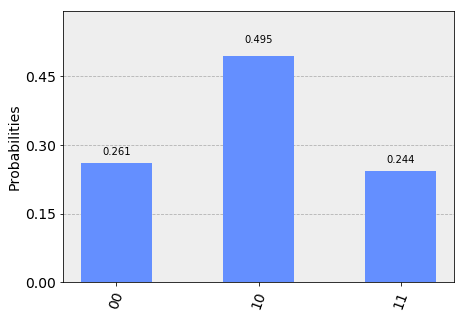

In [21]:
x = QuantumRegister(3)
y = QuantumRegister(2)
c = ClassicalRegister(2, "c")
qc = QuantumCircuit(x, y, c, name="test1")

# or
# x  y
# 00 0
# 01 1
# 10 1
# 11 1

# or
# phi1 = |00>|0> + |01>|0> + |10>|0> + |11>|0>
# phi2 = X(x0,x1) phi1 = |11>|0> + |10>|0> + |01>|0> + |00>|0> 
# phi3 = CCX(0,1,2) phi2 = |11>|1> + |10>|0> + |01>|0> + |00>|0>
# phi4 = X(y0) phi3 = |11>|0> + |10>|1> + |01>|1> + |00>|1>

qc.h(x[0]) 
qc.h(x[1])

# and gate
qc.ccx(x[0],x[1],y[0]) 

# or gate
qc.x(x[0])
qc.x(x[1])
qc.ccx(x[0],x[1],y[1]) 
qc.x(x[0])
qc.x(x[1])
qc.x(y[1])

qc.measure(y[0], c[0])
qc.measure(y[1], c[1])

backend = BasicAer.get_backend('qasm_simulator')
result = execute(qc, backend, shots=1024).result()
counts  = result.get_counts(qc)
print(counts)
plot_histogram(counts)

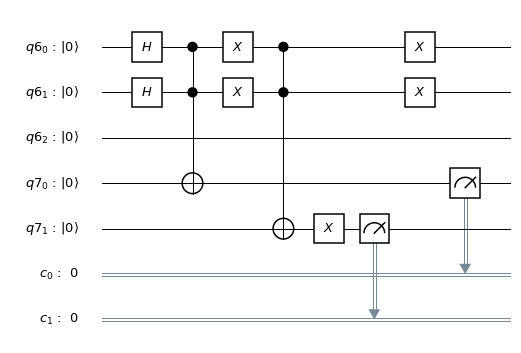

In [11]:
qc.draw(output='mpl')

In [22]:
token = open("../ibm_token.txt","r").read().strip()
IBMQ.enable_account(token)

In [24]:
shots = 1024

provider = IBMQ.get_provider()
print(provider.backends())
backend  = provider.get_backend('ibmq_athens')

job_exp = execute(qc, backend=backend, shots=shots)
job_monitor(job_exp)

HTML(value="<p style='font-size:16px;'>Job Status: job is being initialized </p>")

In [ ]:
result_exp = job_exp.result()
print(result_exp)

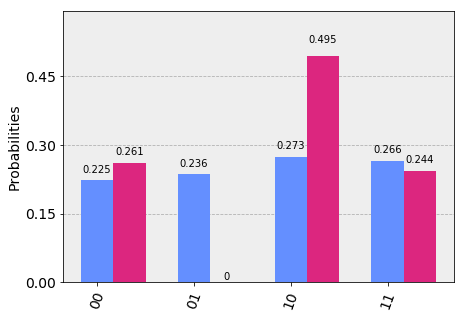

In [26]:
counts_exp = result_exp.get_counts(qc)
plot_histogram([counts_exp,counts])

In [27]:
jobID = job_exp.job_id()
print('JOB ID: {}'.format(jobID))

JOB ID: 5d1977c99ba7e6007350b1ea


In [18]:
print(qc.qasm())

OPENQASM 2.0;
include "qelib1.inc";
qreg q6[3];
qreg q7[2];
creg c[2];
h q6[0];
h q6[1];
ccx q6[0],q6[1],q7[0];
x q6[0];
x q6[1];
ccx q6[0],q6[1],q7[1];
x q6[0];
x q6[1];
x q7[1];
measure q7[0] -> c[0];
measure q7[1] -> c[1];

